# Neural Network For Handwritten Digits Classification | Deep Learning Tutorial 7 (Tensorflow2.0)

In this video we will build our first __"neural network"__ in **'tensorflow and python'** for <u>handwritten digits classification.</u> We will first build a very simple __"neural network"__ with only __input and output layer.__ After that we will add a __hidden layer__ and check how the performance of our model changes. 

Code: https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/1_digits_recognition/digits_recognition_neural_network.ipynb <br>
Credit: https://www.youtube.com/watch?v=iqQgED9vV7k&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=7 <br>
#### Owner: Codebasics

### Handwritten digits classification using neural network
In this notebook we will __classify handwritten digits__ using a __simple neural network__ which has only _**input and output layers.**_ We will than add a _**hidden layer**_ and see how the performance of the model improves. 

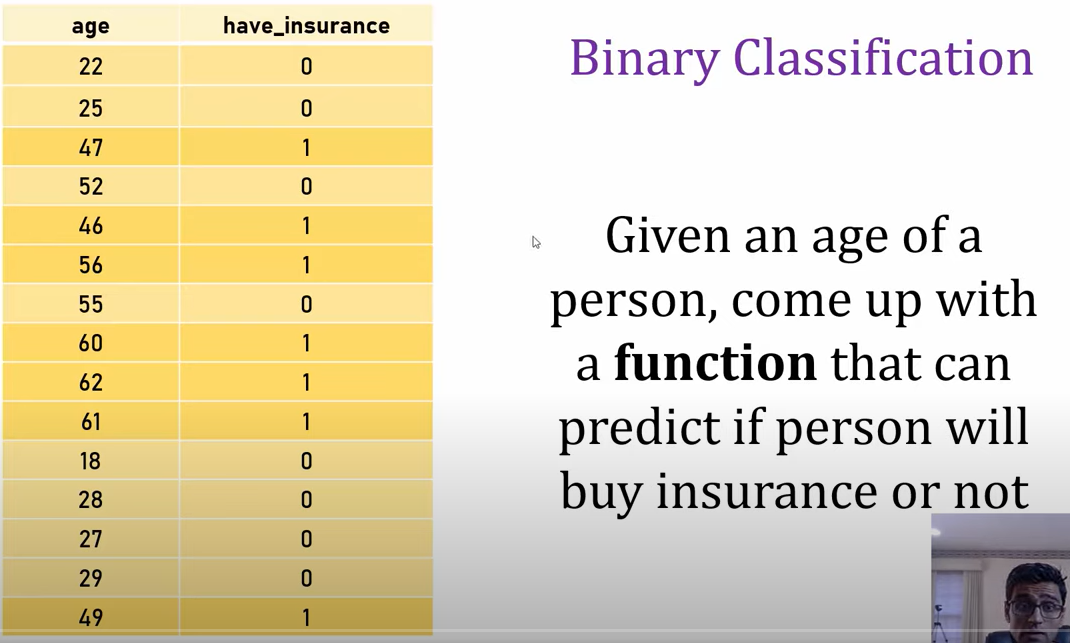

# Linear equation with single neuron
## here only one feature : age

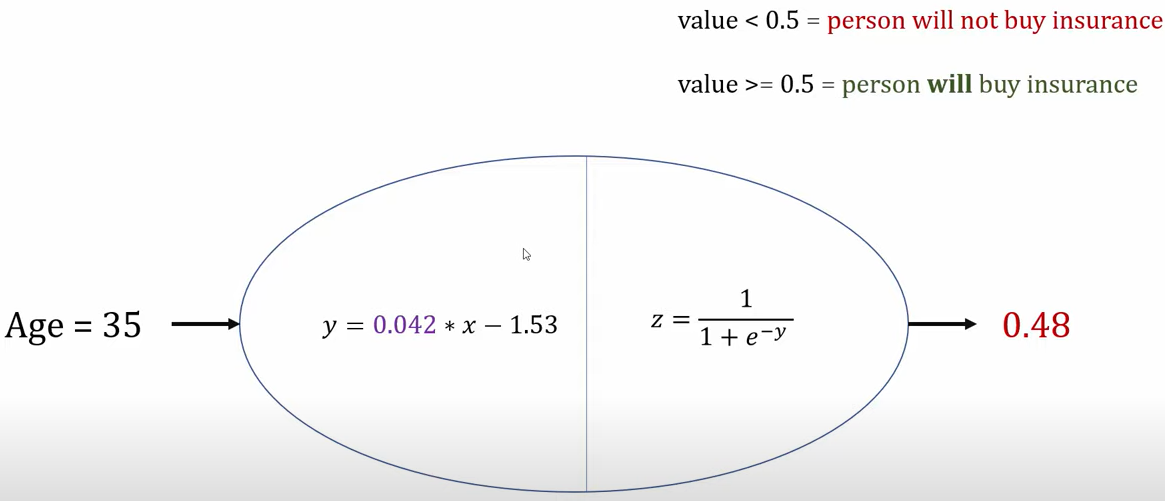 

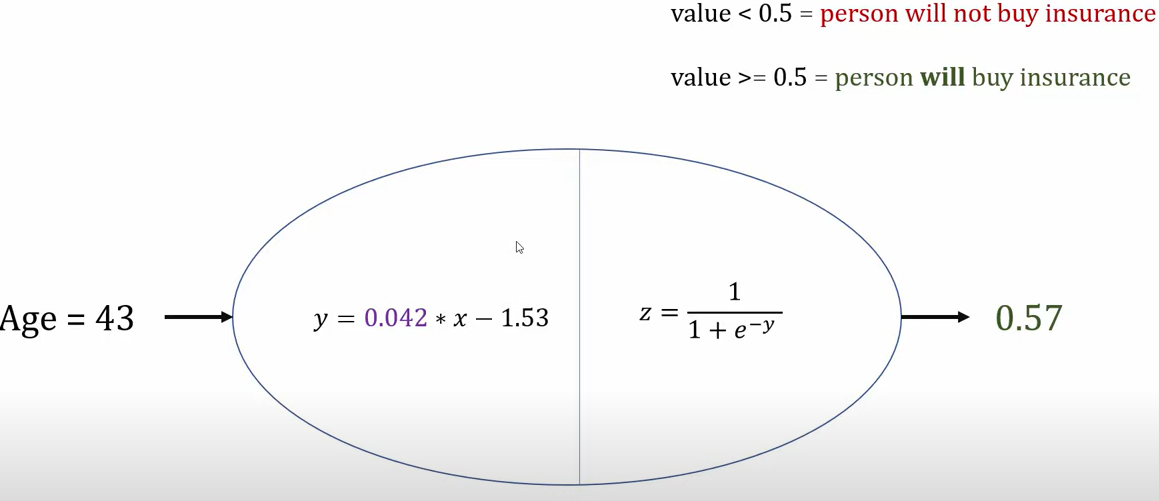

# Linear equation with multiple features: age, income, education 

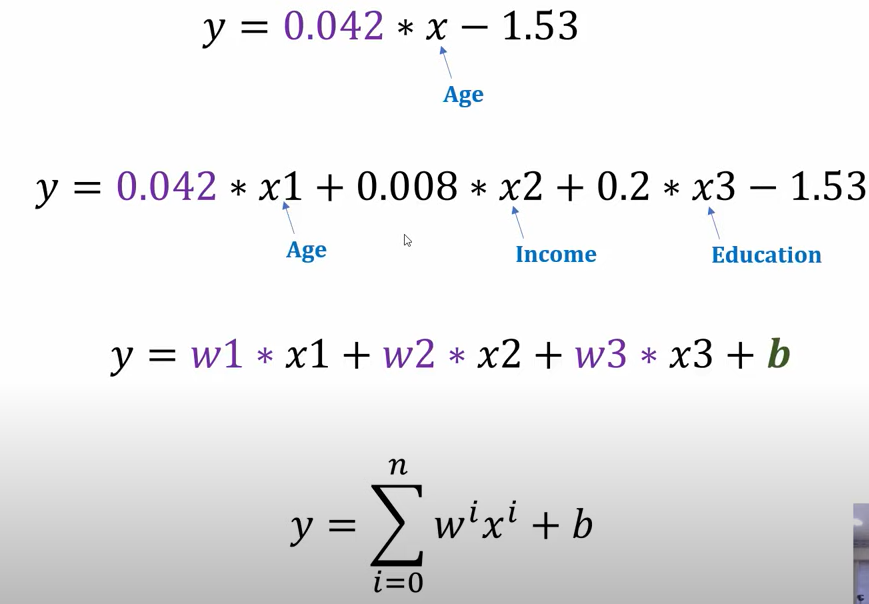

# Neuron with multiple features (or multiple input neurons) 

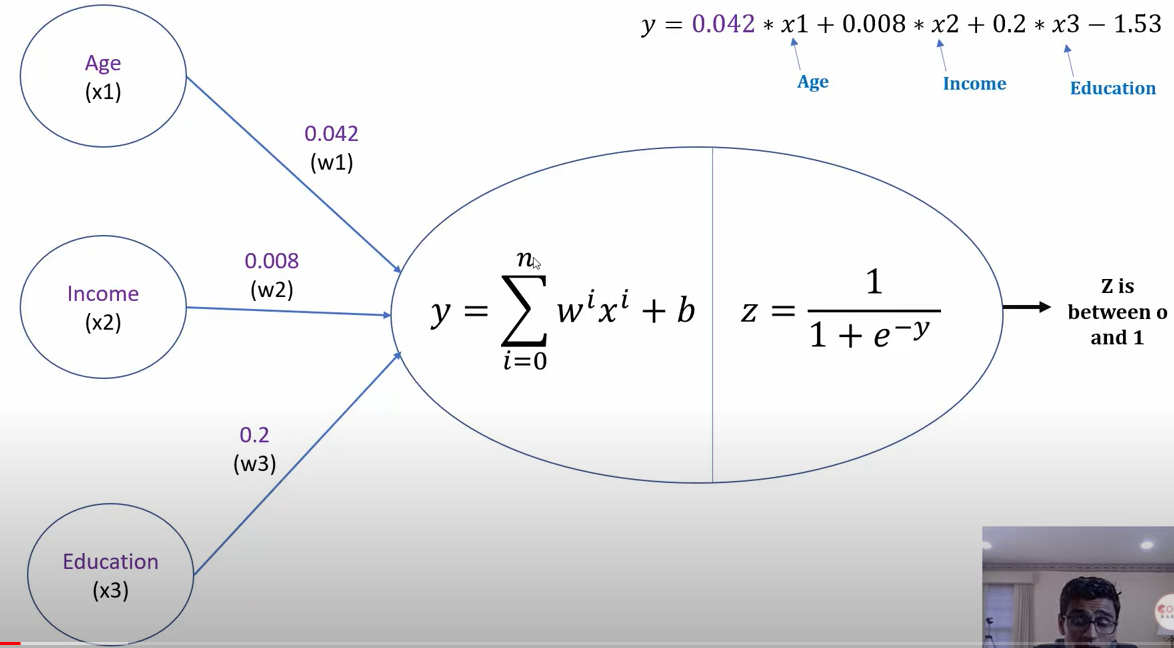

# Actual neuron with hidden layers and weights

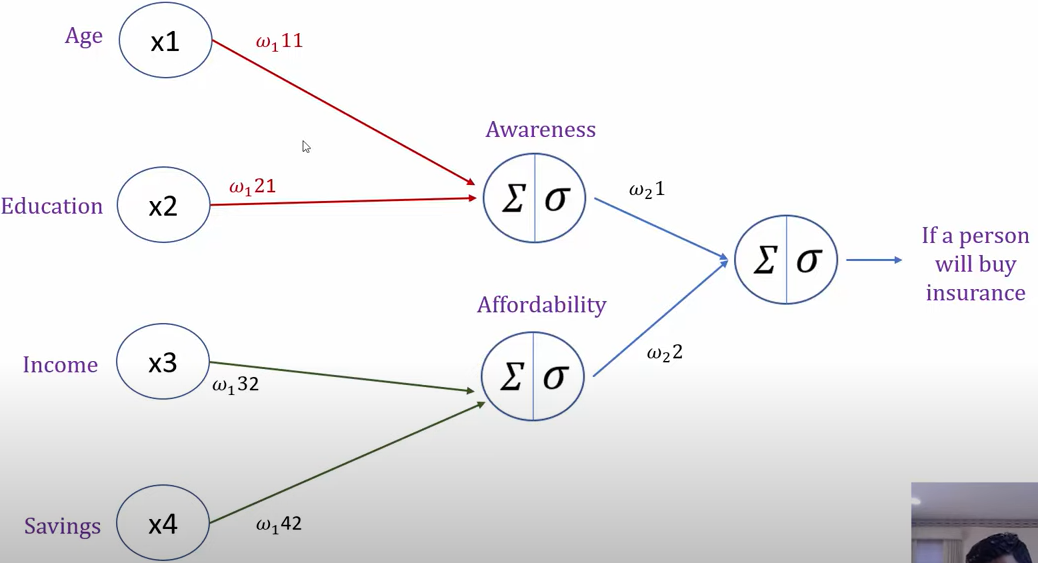

# Dense neuron network, where every neuron is connected with another in hidden layer

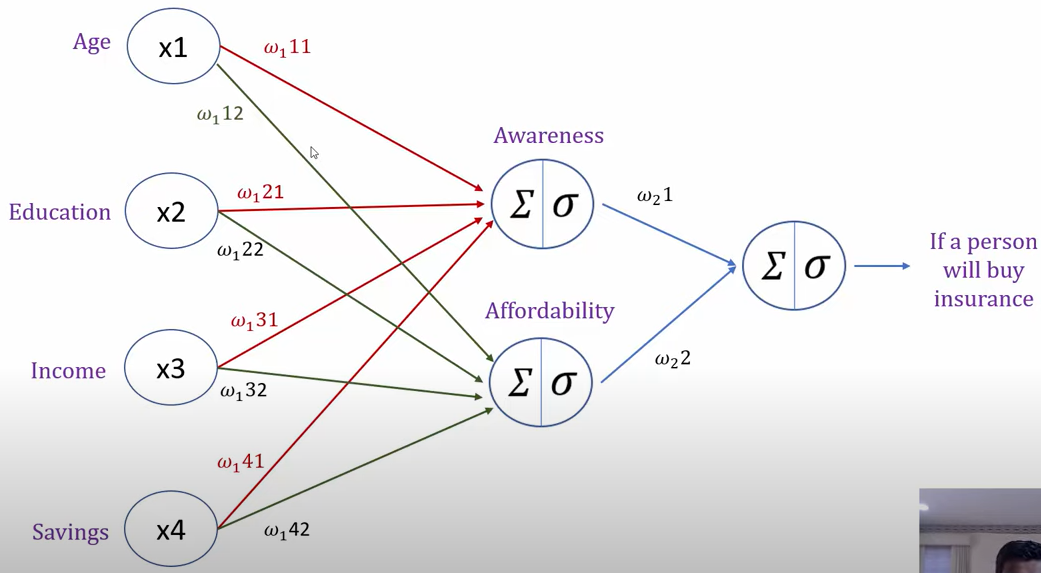

# Simple neuron network with _input layer and output layer_
## Using Sigmoid function

### Detecting numeric 4

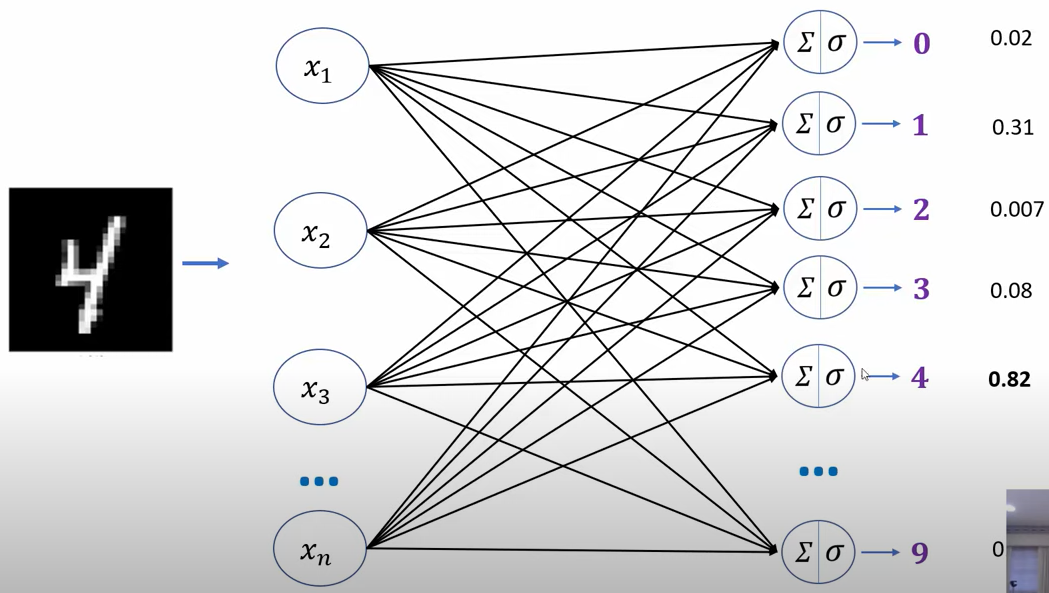

### Detecting numeric 2

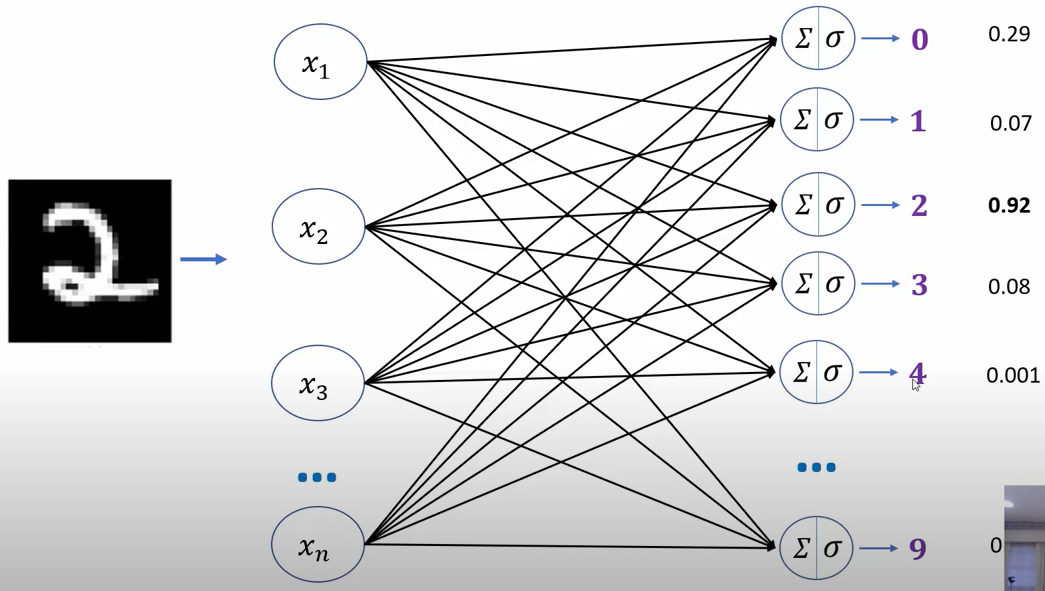

## 2 dimensional array to identify the numeric digit image

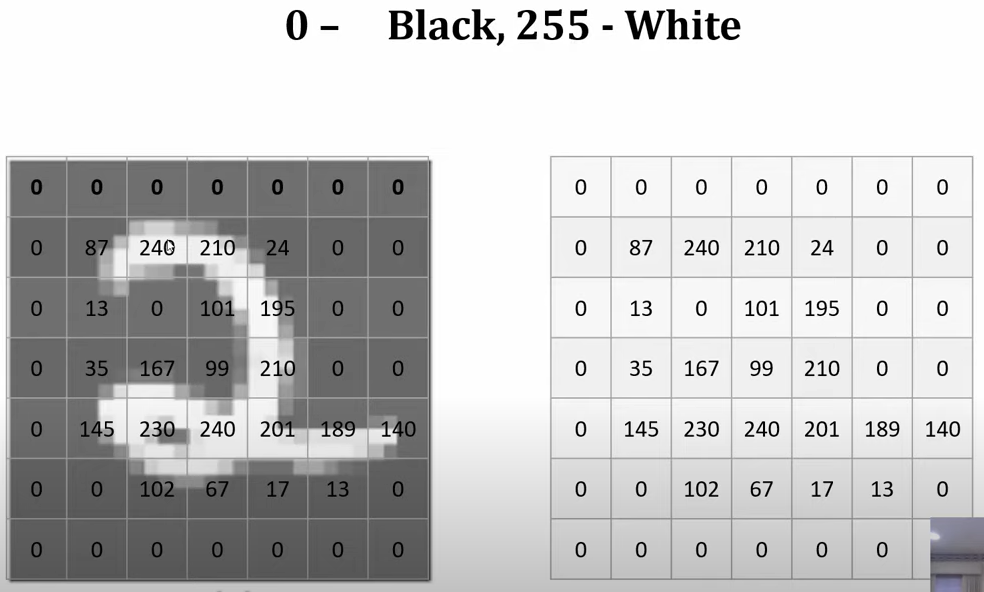

## Two dimensional array to one dimensional <font color='brown'>(flattening)</font>

### 7 x 7 grid, so we will have 49 neurons as an input and each neuron will represent one value between 0 as black and 255 as white

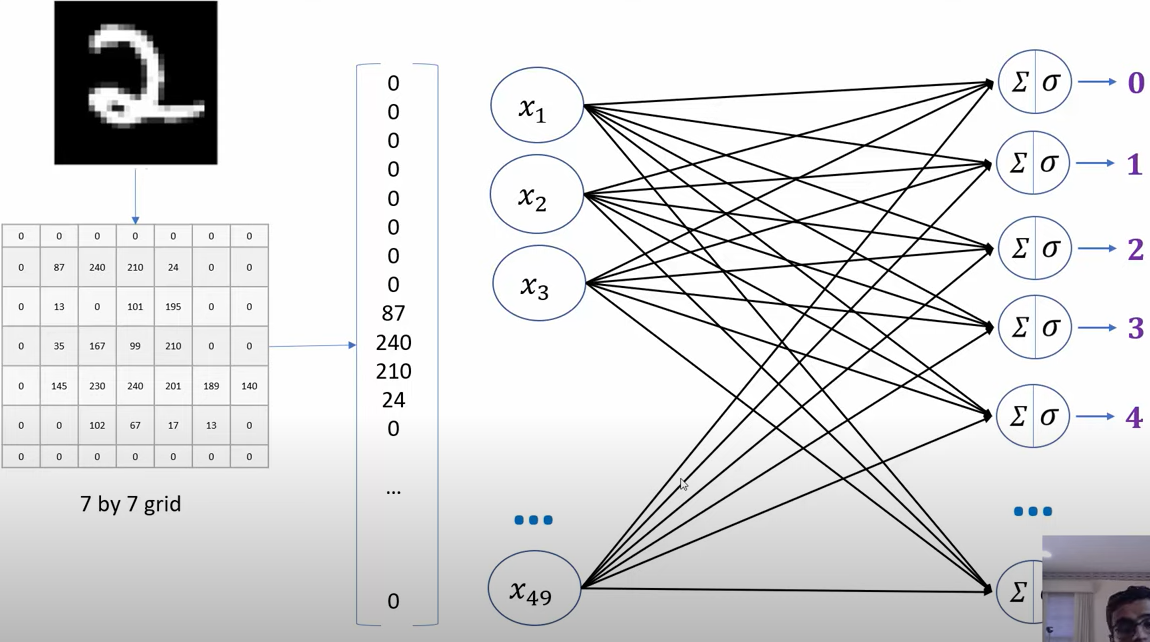

### Here, we will have 28 by 28 grid and then we have to move to single dimension means <font color='brown'>flattening.</font>
### Input layer, then hidden layer and finally output layer

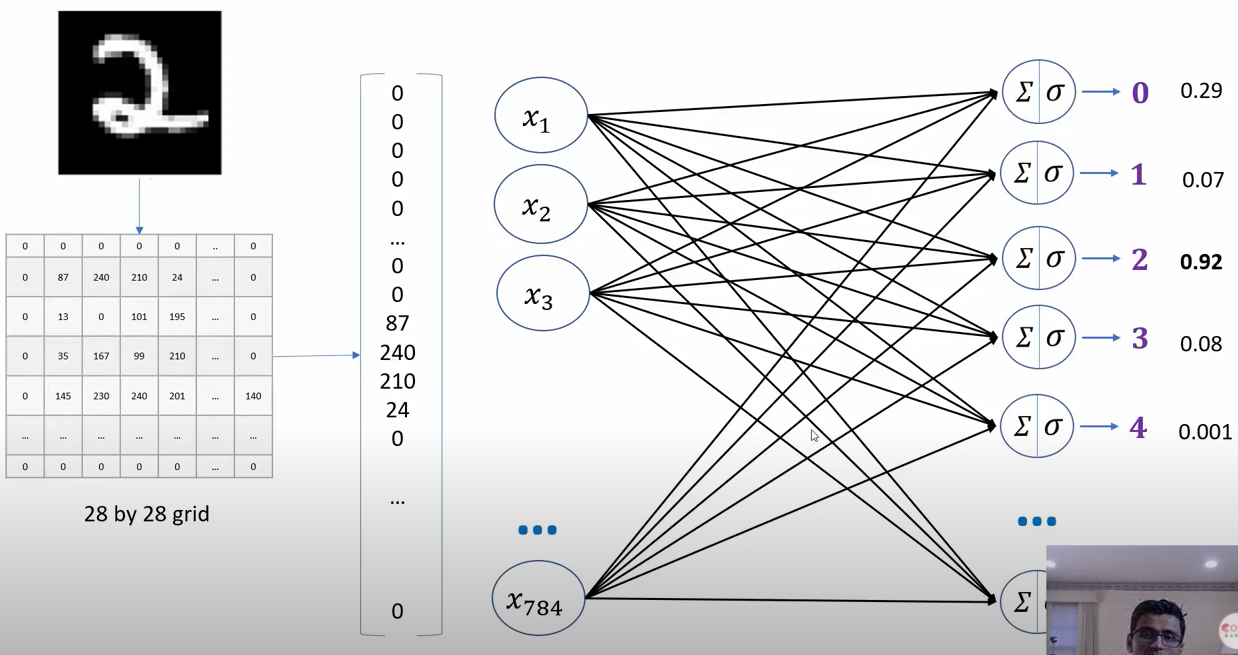

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#### Let's use hand written dataset using "keras"
This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

Returns:
  Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

**x_train**: uint8 NumPy array of grayscale image data with shapes
  `(60000, 28, 28)`, containing the training data. Pixel values range
  from 0 to 255.

**y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
  with shape `(60000,)` for the training data.

**x_test**: uint8 NumPy array of grayscale image data with shapes
  (10000, 28, 28), containing the test data. Pixel values range
  from 0 to 255.

**y_test**: uint8 NumPy array of digit labels (integers in range 0-9)
  with shape `(10000,)` for the test data.

### Loads the MNIST dataset, in proper train and test set

This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train) # training dataset contains 60,000 images of 28x28 pixel

60000

In [4]:
len(X_test) # test dataset contains 10,000 images of 28x28 pixel

10000

In [5]:
 X_train[0].shape # shape size of single digit

(28, 28)

In [6]:
X_train[0] # similar representation in 2 dimensional array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

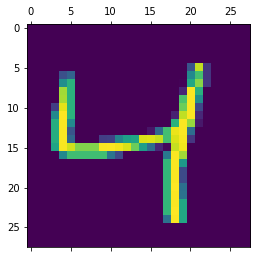

In [7]:
# plt.matshow(X_train[0]) # to see the exact number using matshow of matplotlib
# plt.matshow(X_train[1])
plt.matshow(X_train[2])

In [8]:
# we can confirm the same number by using y_train
y_train[2]

4

In [9]:
# we can see first 5 images as well using this
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
# X_train.shape() # 'tuple' object is not callable
X_train.shape # dataset is of length 60,000 number of samples with each is of 28 by 28

(60000, 28, 28)

## <font color='red'>Scale</font> the array to improve the accuracy

In [11]:
# scaling the entire array, since the values are in between 0 to 255, 
# so to scale the array, we need to divide by 255, it will improve the accuracy.
X_train = X_train / 255
X_test = X_test / 255

## <font color='red'>Flatten</font> the <font color='red'>training & testing</font> array into a one dimension array

In [12]:
# X_train.reshape(len(X_train)) # cannot reshape array of size 47040000 into shape (60000,)
X_train_flattened = X_train.reshape(len(X_train), 28 * 28) 
X_train_flattened # single dimension array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
X_test_flattened = X_test.reshape(len(X_test), 28 * 28) 
X_test_flattened # single dimension array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
# shape of this flattened dataset
X_train_flattened.shape # (60000, 784)
X_test_flattened.shape # (10000, 784)

(10000, 784)

In [15]:
X_train_flattened[0] # flattened dataset representation in one dimension
X_train_flattened[2]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Simple neural network with no hidden layers
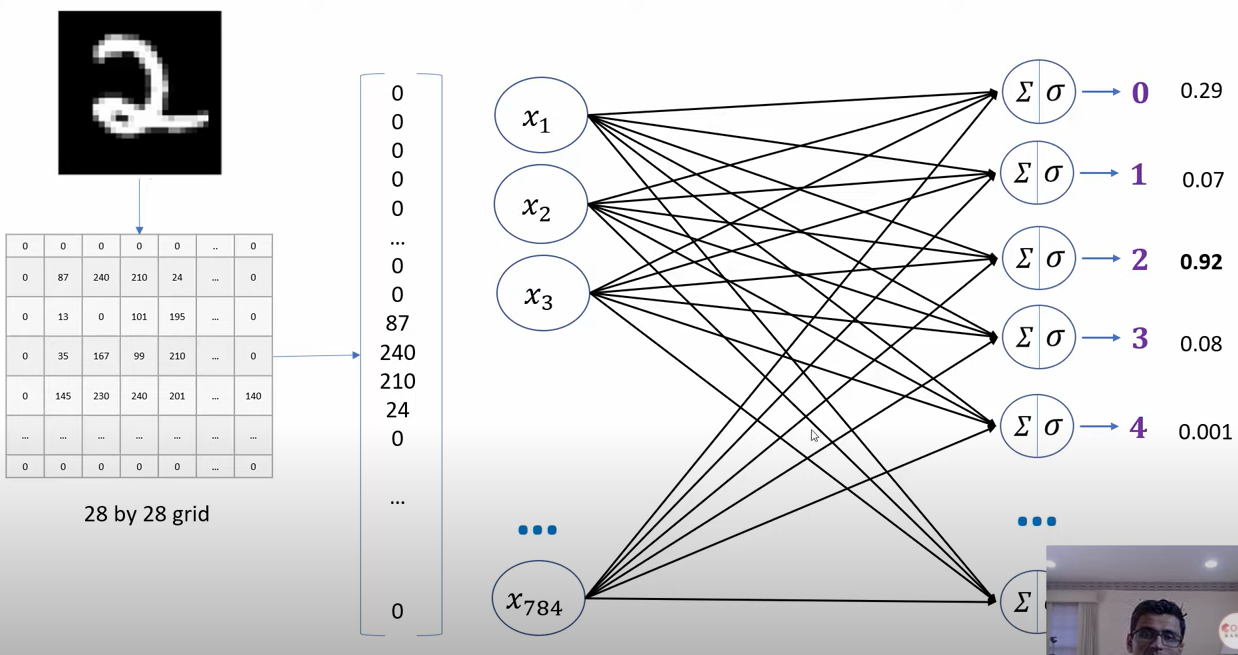

#### <font color='red'>**Sequential**</font> groups a linear stack of layers into a <font color='red'>**tf.keras.Model.**</font>
#### <font color='red'>__Sequential__</font> provides training and inference features on this model.
Note that you can also omit the `input_shape` argument.<br>
In that case the model doesn't have any **weights** until the first call to a training/evaluation method (since it isn't yet built):

In [16]:
# model = keras.Sequential([
#     keras.layers.Dense(10, input_shape(784), activation='sigmoid') # 'input_shape' is not defined
# ])

# model = keras.Sequential([
#     keras.layers.Dense(10, input_shape=(784), activation='sigmoid') # 'int' object is not iterable
# ])

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid') # output neuron=10, input neuron=784
])

# Configures the model for training 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5) # training of the data [input, output, iteration of entire 60k dataset]

Epoch 1/5
1875/1875 [==============================] - 1s 673us/step - loss: 0.4719 - accuracy: 0.8761
Epoch 2/5
1875/1875 [==============================] - 1s 674us/step - loss: 0.3041 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 1s 668us/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 1s 671us/step - loss: 0.2732 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 1s 672us/step - loss: 0.2667 - accuracy: 0.9259


In [17]:
# len.model.weight # 'builtin_function_or_method' object has no attribute 'model'
len(model.weights)

2

### here, evaluate the accuracy of the model

In [18]:
model.evaluate(X_test_flattened, y_test) # evaluate the accuracy on the test dataset [input, output]

313/313 [==============================] - 0s 561us/step - loss: 0.2670 - accuracy: 0.9252


[0.2669590711593628, 0.9251999855041504]

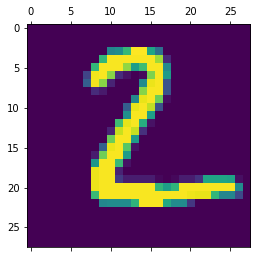

In [19]:
# plt.matshow(X_test_flattened[0]) # not enough values to unpack (expected 2, got 1)
# It will not show the image, bcz we are taking data of flattened, actually need to see the data of X_test

plt.matshow(X_test[1])

In [20]:
model.predict(X_test_flattened) # prediction of all test samples images dataset

array([[2.6360244e-02, 4.1693946e-07, 4.4835687e-02, ..., 9.9985301e-01,
        8.4257007e-02, 6.6284311e-01],
       [4.9128982e-01, 5.8917403e-03, 9.9958038e-01, ..., 1.5070613e-12,
        1.5415582e-01, 4.8244804e-09],
       [3.9917231e-04, 9.9237400e-01, 6.8950635e-01, ..., 1.7944315e-01,
        3.5883343e-01, 5.3133368e-02],
       ...,
       [5.2404389e-06, 3.7884379e-06, 1.5061200e-03, ..., 3.8967538e-01,
        5.0800228e-01, 8.6178470e-01],
       [2.8333068e-04, 2.2336841e-04, 3.1337142e-04, ..., 9.0994428e-05,
        6.6442740e-01, 1.6948581e-04],
       [1.0375321e-02, 5.2115517e-10, 2.4215096e-01, ..., 1.5880532e-08,
        1.4504790e-04, 1.6245940e-06]], dtype=float32)

### prediction of entire test data set and then store in "y_predicted"

In [21]:
# model.predict(X_test_flattened[0]) # Can not predict for a single, I think need to predict for all then extraction for single
y_predicted = model.predict(X_test_flattened)
y_predicted[1] # printing 10 score as an output, starting from 0 till 9

array([4.9128982e-01, 5.8917403e-03, 9.9958038e-01, 4.6712878e-01,
       5.9829081e-10, 8.7200952e-01, 9.2256403e-01, 1.5070613e-12,
       1.5415582e-01, 4.8244804e-09], dtype=float32)

#### np.argmax finds a maximum value of an element from an array, to identify the detected number of an image and returns the index of it 

In [22]:
# get the max value by using numpy
np.argmax(y_predicted[1])

2

#### store all the np.argmax values in a list named as "y_predicted_labels"

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5] # let's, print from the index 0 to 4 (less than 5)

[7, 2, 1, 0, 4]

### build the confusion matrix using tensorflow
The matrix **columns** represent the **prediction labels** and the **rows** represent the **real labels.** 
The **confusion matrix** is always a 2-D array of shape `[n, n]`, where `n` is the number of valid labels for a given classification task. 
Both **prediction and labels** must be 1-D arrays of the same shape in order for this
function to work.

In [24]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels) # [input=y_test, output=y_predicted_labels]
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    1,    0,    5,    7,    3,    1,    1],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   5,    9,  929,   17,    8,    2,   13,   10,   34,    5],
       [   2,    0,   15,  926,    0,   24,    3,   12,   19,    9],
       [   1,    1,    3,    2,  904,    0,   14,    4,    8,   45],
       [  10,    3,    4,   33,   10,  764,   20,    9,   30,    9],
       [   9,    3,    7,    1,    7,    8,  920,    2,    1,    0],
       [   1,    5,   23,    5,    7,    0,    0,  953,    2,   32],
       [   7,    7,    8,   23,    9,   22,   11,   14,  859,   14],
       [  10,    7,    2,    9,   22,    4,    0,   27,    5,  923]])>

### print the confusion matrix in some visual classification
**Seaborn** is a Python **data visualization** library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Text(60.0, 0.5, 'Truth')

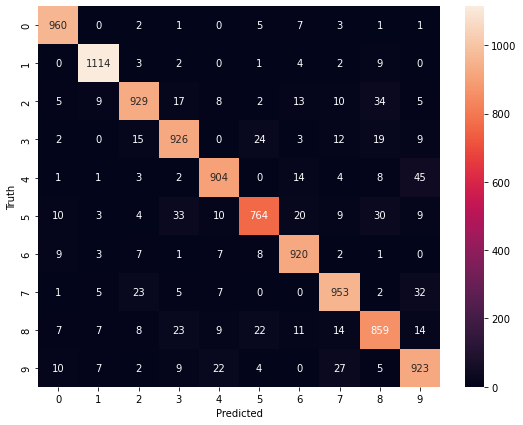

In [25]:
import seaborn as sn
plt.figure(figsize=(9,7)) # figsize=(x_width, y_width)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Add hidden layer to improve the performance and activation function as "ReLU", stands for rectified linear unit, 
### and is a type of activation function. 
#### Mathematically, it is defined as y = max(0, x). Visually, it looks like the following:
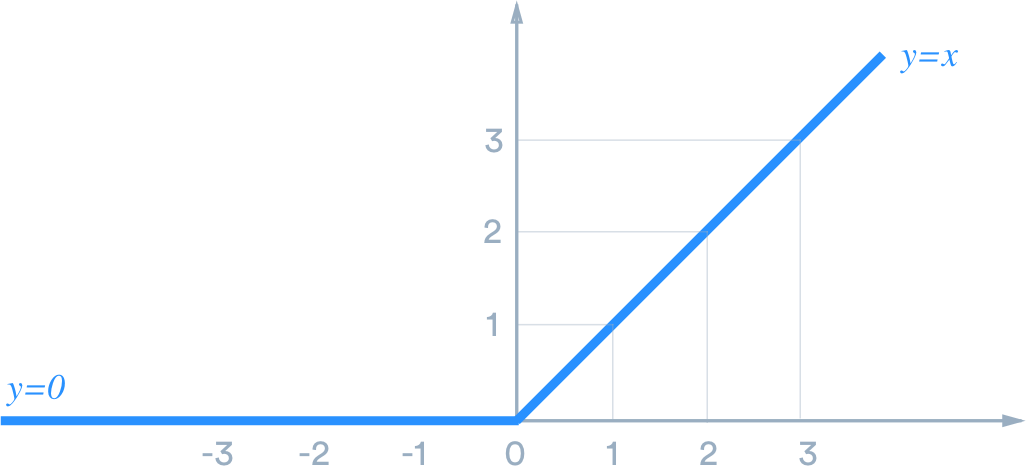
**ReLU** is the most commonly used activation function in **neural networks,** especially in **CNNs.** If you are unsure what activation function to use in your network, **ReLU** is usually a good first choice.

In [26]:
# model = keras.Sequential([
#     keras.layers.Dense(100, input_shape=(784,), activition='relu'),
#     keras.layers.Dense(10, activation='sigmoid') # TypeError: ('Keyword argument not understood:', 'activition')
# ])

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), # number of neuron in hidden layer, let say 100 here
    keras.layers.Dense(10, activation='sigmoid') # number of neuron in output layer, let say 10 here
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
             )

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 905us/step - loss: 0.2724 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 2s 908us/step - loss: 0.1201 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 2s 902us/step - loss: 0.0852 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 2s 913us/step - loss: 0.0651 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 2s 911us/step - loss: 0.0505 - accuracy: 0.9847


In [27]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 731us/step - loss: 0.0805 - accuracy: 0.9762


[0.08047707378864288, 0.9761999845504761]

Text(60.0, 0.5, 'Truth')

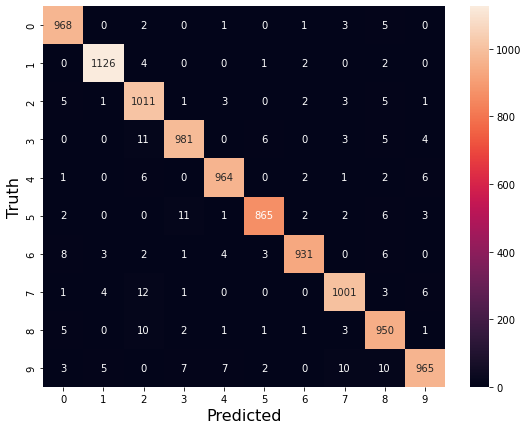

In [28]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels) # [input=y_test, output=y_predicted_labels]
cm

# print the confusion matrix for some visual classification
import seaborn as sn
plt.figure(figsize=(9,7)) # figsize=(x_width, y_width)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Truth', fontsize=16)

## Using kreas flatten layer so that we don't have to call <font color='red'>.reshape</font> on input dataset

In [29]:
# number of neurons in hidden layer, let say 100 here
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # input layer
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), # let's make 100 hidden layer
    keras.layers.Dense(10, activation='sigmoid') # output layer
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
             )

#model.fit(X_train, y_train, epochs=5)
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 935us/step - loss: 0.2763 - accuracy: 0.9210
Epoch 2/10
1875/1875 [==============================] - 2s 949us/step - loss: 0.1252 - accuracy: 0.9634
Epoch 3/10
1875/1875 [==============================] - 2s 964us/step - loss: 0.0857 - accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 2s 921us/step - loss: 0.0651 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 2s 934us/step - loss: 0.0528 - accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 2s 945us/step - loss: 0.0412 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 2s 992us/step - loss: 0.0354 - accuracy: 0.9887
Epoch 8/10
1875/1875 [==============================] - 2s 975us/step - loss: 0.0291 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0234 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/st